In [37]:
import sys
sys.path.insert(0,'../classes')
sys.path.insert(0,'../analysis')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=3,suppress=True)
import importlib

In [36]:
import logging
import numpy as np

import coloredlogs

from arena import Arena
from coach import Coach
from beck.beck_game import BeckGame as Game
from beck.beck_nnet import NNetWrapper as nn
from beck.beck_players import HumanBeckPlayer, NNPolicyPlayer, NNValuePlayer
from mcts import MCTS
from utils import *
log = logging.getLogger(__name__)

from keras import backend as K

import tournament
participant_iters = tournament.participant_iters

import value_analysis as va

participants_dir = '/scratch/zz737/fiar/tournaments/tournament_4' # dir for trained networks
results_dir = '/scratch/zz737/fiar/tournaments/results/tournament_4'
moves_dir = '/scratch/zz737/fiar/tournaments/tournament_4/moves/raw/'

In [5]:
!python ../classes/tournament.py --play_as_human

{'mcts100_cpuct1': [1, 2, 3, 4, 6, 7, 9, 11, 12, 16, 18, 21, 25, 28, 29, 30, 37, 38, 39, 45, 47], 'mcts100_cpuct2': [1, 2, 3, 4, 6, 8, 12, 14, 15, 16, 21, 22, 24, 26, 27, 30, 32, 35, 39], 'mcts100_cpuct3': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 16, 17, 18, 20, 21, 25, 26, 28, 32, 34, 35, 36], 'mcts25_cpuct1': [1, 2, 3, 4, 9, 11, 13, 14, 16, 19, 22, 25, 28, 29, 31, 37, 39, 45, 59, 61], 'mcts50_cpuct1': [1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 17, 18, 20, 21, 23, 25, 28, 29, 31, 37, 39, 41, 44, 45, 47, 48, 53], 'mcts80_cpuct1': [1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 19, 20, 21, 23, 24, 28, 34, 35, 36, 40], 'mcts80_cpuct2': [1, 2, 5, 6, 8, 10, 12, 13, 15, 17, 18, 19, 22, 25, 28, 30, 31, 34, 37, 38, 39, 40, 43, 45, 46, 51], 'mcts80_cpuct3': [1, 2, 5, 6, 7, 9, 12, 13, 14, 19, 21, 22, 23, 24, 26, 27, 28, 35, 36, 42, 43, 47, 49, 50, 51, 53, 54, 55, 56, 57]}
189 participant iterations!
Namespace(play_ai_round_robin=False, play_as_human=True)


Game beginning! mcts100_cpuct1;1 v/s human...
2021-06-21 05:14

In [3]:
g = Game(4, 9, 4)
test_board = g.getInitBoard()
test_board[0:3,4]=-1
test_board[0:2,5]=1
print(test_board)

[[ 0  0  0  0 -1  1  0  0  0]
 [ 0  0  0  0 -1  1  0  0  0]
 [ 0  0  0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [ ]:
g = Game(4, 9, 4)   
test_board = g.getInitBoard()
test_board[0:3,4]=-1
test_board[0:2,5]=1
# test_board[0,0:3]=-1
# test_board[1,0:2]=1
# test_board[1,0:3]=-1
# test_board[2,0:2]=1

test_board_flpud = np.flipud(test_board)

iters = tournament.iters
import time
t = time.time()
with tf.device("/GPU:0"):
#     v_l_dict = get_iters_test_board_value(test_board,iters,g)
    v_l_flpud_dict = get_iters_test_board_value(test_board_flpud,iters,g)
print(time.time() - t)

In [ ]:
test_board

In [25]:
participant_iters

['mcts100_cpuct1;1',
 'mcts100_cpuct1;2',
 'mcts100_cpuct1;3',
 'mcts100_cpuct1;4',
 'mcts100_cpuct1;6',
 'mcts100_cpuct1;7',
 'mcts100_cpuct1;9',
 'mcts100_cpuct1;11',
 'mcts100_cpuct1;12',
 'mcts100_cpuct1;16',
 'mcts100_cpuct1;18',
 'mcts100_cpuct1;21',
 'mcts100_cpuct1;25',
 'mcts100_cpuct1;28',
 'mcts100_cpuct1;29',
 'mcts100_cpuct1;30',
 'mcts100_cpuct1;37',
 'mcts100_cpuct1;38',
 'mcts100_cpuct1;39',
 'mcts100_cpuct1;45',
 'mcts100_cpuct1;47',
 'mcts100_cpuct2;1',
 'mcts100_cpuct2;2',
 'mcts100_cpuct2;3',
 'mcts100_cpuct2;4',
 'mcts100_cpuct2;6',
 'mcts100_cpuct2;8',
 'mcts100_cpuct2;12',
 'mcts100_cpuct2;14',
 'mcts100_cpuct2;15',
 'mcts100_cpuct2;16',
 'mcts100_cpuct2;21',
 'mcts100_cpuct2;22',
 'mcts100_cpuct2;24',
 'mcts100_cpuct2;26',
 'mcts100_cpuct2;27',
 'mcts100_cpuct2;30',
 'mcts100_cpuct2;32',
 'mcts100_cpuct2;35',
 'mcts100_cpuct2;39',
 'mcts100_cpuct3;1',
 'mcts100_cpuct3;2',
 'mcts100_cpuct3;3',
 'mcts100_cpuct3;4',
 'mcts100_cpuct3;5',
 'mcts100_cpuct3;7',
 'mcts1

In [4]:
import tensorflow as tf

# nmcts, nnet = tournament.get_player(g, participants_dir, participant_iters[20])
participants_dir_one = os.path.join(participants_dir,'checkpoints_mcts100_cpuct2_id-3754964')
nmcts_p_late, nnet_late = tournament.get_player(g, participants_dir_one, 'mcts100_cpuct2;70')
nmcts_p_early, nnet_early = tournament.get_player(g, participants_dir_one, 'mcts100_cpuct2;5')
nmcts_p_mid, nnet_mid = tournament.get_player(g, participants_dir_one, 'mcts100_cpuct2;20')
# mcts80_cpuct1;40
# mcts80_cpuct2;40
# mcts80_cpuct2;15
# mcts80_cpuct3;10



# p,v = nnet.predict(-test_board)

In [6]:
nnet_dict = {'early':nnet_early,'mid':nnet_mid,'late':nnet_late}

In [18]:
somemoves_fn = '/scratch/zz737/fiar/tournaments/tournament_4/moves/raw/checkpoints_mcts100_cpuct2_id-3754964/' \
+\
'mcts100_cpuct2;70.csv'

In [19]:
somemoves_fn

'/scratch/zz737/fiar/tournaments/tournament_4/moves/raw/checkpoints_mcts100_cpuct2_id-3754964/mcts100_cpuct2;70.csv'

In [33]:
moves = pd.read_csv(somemoves_fn,sep=' ',header=None)
moves.columns = ['bp','wp','player','move','rt','iter','value']


In [34]:
moves

,bp,wp,player,move,rt,iter,value
0,8192,0,white,2147483648,0,mcts100_cpuct2;70,-0.077968
1,536879104,2147483648,white,4194304,0,mcts100_cpuct2;70,0.067675
2,536879120,2151677952,white,2097152,0,mcts100_cpuct2;70,-0.151002
3,536879124,2153775104,white,1048576,0,mcts100_cpuct2;70,0.272241
4,536879156,2154823680,white,8388608,0,mcts100_cpuct2;70,1.000000
...,...,...,...,...,...,...,...
20978,4836563976,2149622292,white,134217728,0,mcts100_cpuct2;70,-0.002462
20979,5104999432,2283840020,white,2,0,mcts100_cpuct2;70,-0.008005
20980,5105064968,2283840022,white,16777216,0,mcts100_cpuct2;70,-0.001254
20981,5105064969,2300617238,white,16384,0,mcts100_cpuct2;70,0.686225


In [40]:
i

17483

In [61]:
ent_dict = {'early':[],'mid':[],'late':[]}
for tt in range(1000):
    i = np.random.randint(len(moves))
    test_board = va.get_board(moves.iloc[i])
#     print(test_board)

    
    for k,net in nnet_dict.items():
        p,v=net.predict(test_board)
#         print(k,p.reshape(4,9))
        ent=entropy(p)
#         print('entropy',ent)
        tot_pieces = np.sum(np.abs(test_board))

        ent_dict[k].append([tot_pieces, ent])
for k in ent_dict.keys():
    ent_dict[k] = np.array(ent_dict[k])

Text(0, 0.5, 'policy entropy')

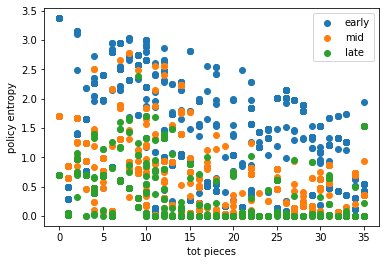

In [62]:
for k in ent_dict.keys():
    plt.scatter(ent_dict[k][:,0],ent_dict[k][:,1],label=k)
plt.legend()
plt.xlabel('tot pieces')
plt.ylabel('policy entropy')

In [9]:
entropy = lambda p:-(p * np.log(p)).sum()

In [15]:
import copy
test_board = g.getInitBoard()
test_board[1,-3]=0
# test_board[2,-3]=0
# test_board[3,-2]=0
# test_board[3,-4] = 1
# test_board[1,-3] = -1
# test_board[2,7] = -1
test_board[2,8] = 0
# test_board[2,6]=-1

# test_board = -test_board
print(test_board)

p,v = nnet.predict(test_board)
print(p.reshape((4,9)))
print(v)
# nmcts(-test_board)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
[[0.    0.    0.    0.    0.437 0.    0.    0.    0.   ]
 [0.    0.    0.035 0.    0.    0.    0.034 0.    0.   ]
 [0.    0.    0.035 0.    0.    0.    0.033 0.    0.   ]
 [0.    0.    0.    0.    0.426 0.    0.    0.    0.   ]]
[0.426]


In [16]:
import beck.beck_players as bbp
import importlib
importlib.reload(bbp)

nnvp = bbp.NNValuePlayer(g,nnet)
choice, v_l = nnvp.play(test_board,-1)

In [47]:
g = Game(4, 9, 4)
test_board = g.getInitBoard()
# test_board[1,2:5]=-1
# test_board[2,2:4]=1
# test_board[2,7]=1

p1_loc = np.array([[2,4],[1,4],[1,3]])
p2_loc = np.array([[2,1],[0,4]])

for loc in p1_loc:
    test_board[loc[0],loc[1]]=1
for loc in p2_loc:
    test_board[loc[0],loc[1]]=-1


test_board = test_board
print(test_board)

p,v = nnet.predict(test_board)
print(p.reshape((4,9)))
print(v)

choice, v_l = nnvp.play(test_board,-1)
print('choice',choice)
print('v_l ',np.array(v_l).reshape(4,9))

[[ 0  0  0  0 -1  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0]
 [ 0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[[0.    0.    0.012 0.003 0.    0.    0.    0.    0.   ]
 [0.    0.    0.832 0.    0.    0.128 0.015 0.    0.   ]
 [0.    0.    0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.001 0.    0.006 0.001 0.    0.   ]]
[0.998]
choice 14
v_l  [[   0.999    0.99     0.717    0.985 1000.       0.889    0.974    0.999
     1.   ]
 [   0.835    0.957    0.275 1000.    1000.       0.271    0.997    0.999
     1.   ]
 [   0.996 1000.       0.937    0.857 1000.       0.995    0.999    1.
     1.   ]
 [   1.       0.983    0.991    0.996    1.       1.       0.997    0.955
     1.   ]]


# play with value player

In [75]:
import beck.beck_players as bbp
import importlib
importlib.reload(bbp)

participants_dir_one = os.path.join(participants_dir,'checkpoints_mcts100_cpuct2_id-37549660')
nmcts_p, nnet70 = tournament.get_player(g, participants_dir_one, 'mcts100_cpuct2;70')
nmcts_p, nnet30 = tournament.get_player(g, participants_dir_one, 'mcts100_cpuct2;30')

# nnet = [nnet70,nnet30]
nnet = [nnet30,nnet70]

nnvp70 = bbp.NNValuePlayer(g,nnet70)
nnvp30 = bbp.NNValuePlayer(g,nnet30)
# choice, v_l = nnvp.play(test_board,-1)

ai_nonmcts_70 = lambda x:nnvp70.play(x,-1)[0] #return (action, list of values)
# ai_nonmcts_30 = lambda x:nnvp30.play(x,1)[0] #return (action, list of values)
ai_nonmcts_30 = lambda x:nnvp30.play(x,-1)[0] #return (action, list of values)

human_player = HumanBeckPlayer(g)
human = lambda x: human_player.play(x)

g = Game(4, 9, 4)
# arena = Arena(human, ai_nonmcts, g, display=g.display)
# arena = Arena(ai_nonmcts_70, ai_nonmcts_30, g, display=g.display)
# arena = Arena(ai_nonmcts_30, ai_nonmcts_70, g, display=g.display)
arena = Arena(human, ai_nonmcts_30, g, display=g.display)

arena.playGame(verbose=True,nnet=nnet, is_save_moves=False)
# arena.playGames(4,nnet=nnet)

Value of player to go: [0.424]
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 5] [ 3 6] [ 3 7] [ 3 8] 4 1
Invalid move
1 4
Value of player to go: [0.046]
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - O - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Value of player to go: [-0.334]
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - O - - - - |
2 |- - - - - - - - - |
3 |- - - - X - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [

KeyboardInterrupt: Interrupted by user

In [24]:
import play_ai
import importlib
importlib.reload(play_ai)
play_ai.main()

2021-04-01 14:00:55 cm01.nyu.cluster play_ai[3902741] INFO Loading BeckGame...
2021-04-01 14:00:55 cm01.nyu.cluster play_ai[3902741] INFO Loading NNetWrapper...
2021-04-01 14:00:55 cm01.nyu.cluster play_ai[3902741] INFO Loading checkpoint "/scratch/zz737/fiar/tournaments/tournament_4/checkpoints_mcts100_cpuct2_id-37549660//checkpoint_70.pth.tar"...
2021-04-01 14:00:56 cm01.nyu.cluster play_ai[3902741] INFO Starting the game 🎉


Value of player to go: [0.426]
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6] [ 1 7] [ 1 8] [ 2 0] [ 2 1] [ 2 2] [ 2 3] [ 2 4] [ 2 5] [ 2 6] [ 2 7] [ 2 8] [ 3 0] [ 3 1] [ 3 2] [ 3 3] [ 3 4] [ 3 5] [ 3 6] [ 3 7] [ 3 8] 2 4
Value of player to go: [0.074]
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - O - - - - |
3 |- - - - - - - - - |
-----------------------
Value of player to go: [0.757]
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- X - - O - - - - |
3 |- - - - - - - - - |
-----------------------
[ 0 0] [ 0 1] [ 0 2] [ 0 3] [ 0 4] [ 0 5] [ 0 6] [ 0 7] [ 0 8] [ 1 0] [ 1 1] [ 1 2] [ 1 3] [ 1 4] [ 1 5] [ 1 6

In [4]:
g = Game(4, 9, 4)
board = g.getInitBoard()
black_pieces = np.array([[0,1],[0,4],[0,5],[1,3],[1,4],[1,5],[1,6],[2,4],[2,6],[3,2]])
white_pieces = np.array([[0, 3],[1,2],[2,2],[2,3],[2,5],[2,7],[3,3],[3,4],[3,7]])
board[black_pieces[:,0],black_pieces[:,1]] = 1
board[white_pieces[:,0],white_pieces[:,1]] = -1

In [ ]:
# test_board = g.getInitBoard()
# test_board = np.tile(test_board,(2,1,1))
test_board = randb
nnet.predict_batch(test_board)

In [ ]:
K.clear_session()

In [ ]:
keys = list(v_l_flpud_dict.keys())
keys = keys[5:9]
plt.figure()
for k in keys:
    plt.plot(v_l_flpud_dict[k],label=k)
plt.legend()

In [ ]:
keys = list(v_l_dict.keys())
keys = keys[5:9]
plt.figure()
for k in keys:
    plt.plot(v_l_dict[k],label=k)
plt.legend()

In [ ]:
participant_iters

In [ ]:
def get_iters_test_board_value(test_board,iters,game):
    agent_keys = iters.keys()
    v_l_dict = {}
    for k in agent_keys:
        p_iters = [f'{k};{x}' for x in iters[k]]
        v_l = get_participant_iters_test_board_value(test_board,p_iters,game)
        v_l_dict[k] = v_l
    return v_l_dict
        

def get_participant_iters_test_board_value(test_board,participant_iters,game):
    v_l = []
    for p in participant_iters:
        nmcts, nnet = tournament.get_player(game, participants_dir, p)
        p,v = nnet.predict(test_board)
        v_l.append(v)
        K.clear_session()
    return np.array(v_l)
        

In [ ]:
v_l = get_participant_iters_test_board_value(test_board,participant_iters[:40])

In [ ]:
participant_iters[:40]

In [ ]:
plt.plot(v_l)

In [ ]:
numMCTSSims = 80
cpuct = 1
model_class_name = f'checkpoints_mcts{numMCTSSims}_cpuct{cpuct}'
model_instance_name = 'checkpoint_40'
temp = 0
model_dir = '/scratch/zz737/fiar/tournaments/tournament_1/'

args = dotdict({
    'display':True,
    'numIters': 1000,
    'numEps': 100,              # Number of complete self-play games to simulate during a new iteration.
    'tempThreshold': 15,        #
    'temp':temp,
    'updateThreshold': 0.6,     # During arena playoff, new neural net will be accepted if threshold or more of games are won.
    'maxlenOfQueue': 200000,    # Number of game examples to train the neural networks.
    'numMCTSSims': numMCTSSims,#100,          # Number of games moves for MCTS to simulate.
    'arenaCompare': 40,         # Number of games to play during arena play to determine if new net will be accepted.
    'cpuct': cpuct,

    'checkpoint': './temp/',
    'load_model': True,
    # 'load_folder_file': (f'../models/{model_class_name}',f'{model_instance_name}.pth.tar'),
    'load_folder_file': (f'{model_dir}/{model_class_name}',f'{model_instance_name}.pth.tar'),

    'numItersForTrainExamplesHistory': 20,

    # for saving moves
    'is_save_moves': False,
    'save_moves_folder': f'../moves/{model_class_name}',
    'save_moves_file': f'{model_instance_name}_temp{temp}.csv', 
    'overwrite': True, # whether overwrite the existing csv file or add to it

    #
    'numGames':2,

})


In [ ]:
g = Game(4, 9, 4)

log.info('Loading %s...', nn.__name__)
nnet = nn(g)
nnet.load_checkpoint(args.load_folder_file[0], args.load_folder_file[1])

In [17]:
test_board = g.getInitBoard()
test_board[0:3,4]=-1
test_board[0:2,5]=1

In [18]:
test_board

array([[ 0,  0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
nnet.predict(test_board) # checkpt 1

In [ ]:
nnet.predict(test_board) #checkpt 11

In [ ]:
nnet.predict(test_board) #checkpt 22

In [ ]:
test_board = g.getInitBoard()
test_board[2,4] = 1
nnet.predict(test_board)

In [ ]:
test_board = g.getInitBoard()
test_board[2,4] = -1
nnet.predict(test_board)